# <center> Predicting loan repayment </center>

### About the project

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

__project Goal__: Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we can build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

The "loan_status" column contains our label.

__About the dataset__: We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the dataset
df = pd.read_csv('..Datasets\\lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
# checking data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

### Section 1: Exploratory Data Analysis

__Our goal in this part is understanding which variables are important, view summary statistics, and visualize the data__

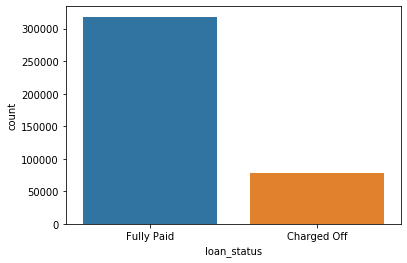

In [4]:
# comparing fully paid and charged off loans
sns.countplot(x='loan_status',data=df)

(0, 45000)

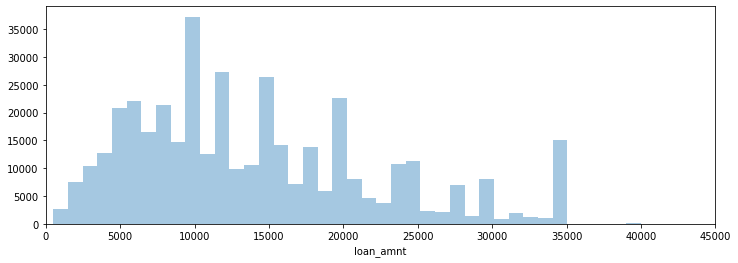

In [5]:
# Create a histogram of the loan_amnt column
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

One thing we can observe  in the above diagram is there are spikes in even amounts like 10000,15000,20000 etc. which actually make sense. 

In [6]:
# checking the correlation between features
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

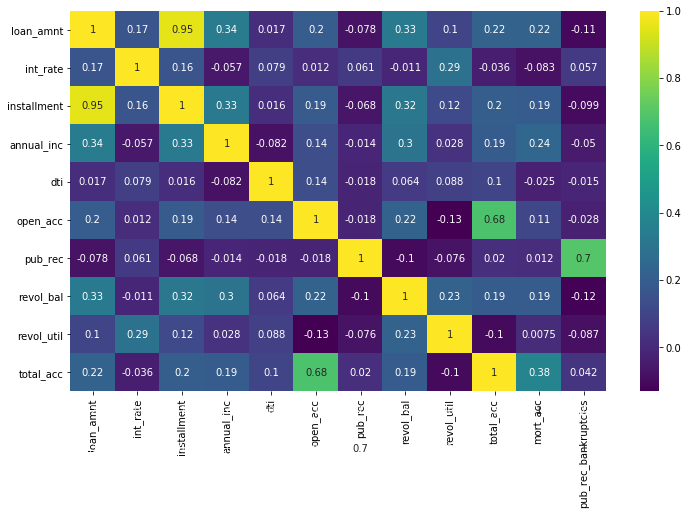

In [7]:
# visualizing correlation using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

Notice there is almost perfect correlation between __installment__ (The monthly payment owed by the borrower if the loan originates) and __loan amnt__ (The listed amount of the loan applied for by the borrower) features. Explore this features further. Print out  their description and perform a scatterplot between them.

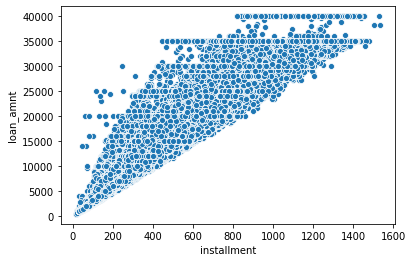

In [8]:
# plotting installment and loan amount features
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

Next we will create a boxplot showing the relationship between the loan_status and the Loan Amount.

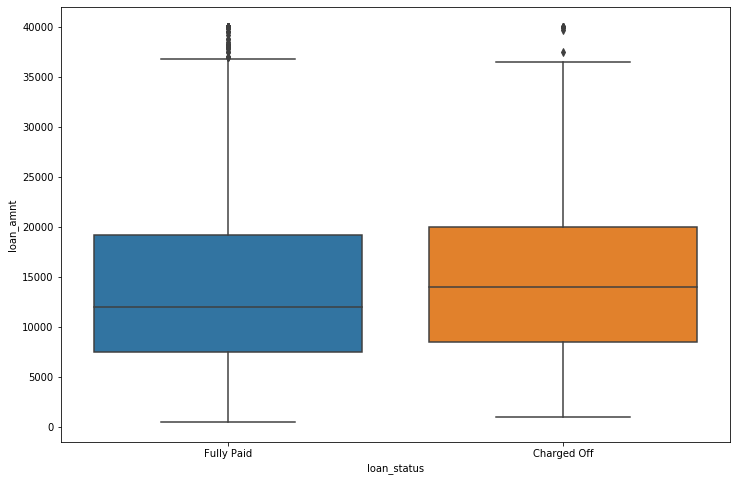

In [9]:
# About comparing loan status and loan amount
plt.figure(figsize = (12,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

The plot shows that the charged off amount is little bit higher than fully paid. But over all the two amounts are very similar. 

Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [10]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


This again confirms what the box plot has shown and the average loans charged off amount is slighly higher than the fully paid.

Next let's explore the Grade and SubGrade columns that LendingClub attributes to the loans.

In [11]:
# unique possible grades
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
# unique possible subgrades
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Creating a countplot that is comparing fully paid and charged off loans based on loan grade.

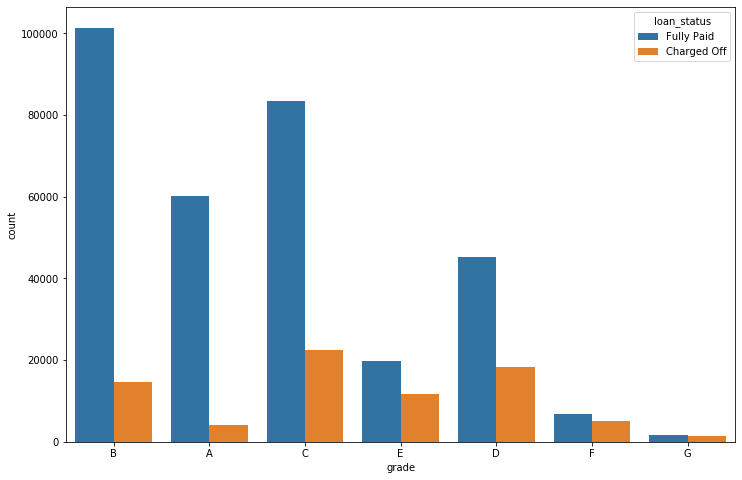

In [13]:
plt.figure(figsize = (12,8))
sns.countplot(x='grade',data=df,hue='loan_status')

There is not that much you can infer from the diagram. However, you can clearly see that the percentage of charged off increases as loan grade increases. This means that the best loans are graded A and second best are graded B and C and so on.

Display a count plot per subgrade of the entire dateset. We are trying to txplore both all loans made per subgrade as well being separated based on the loan_status.

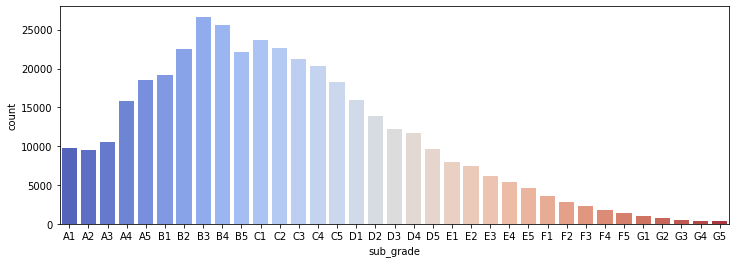

In [14]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

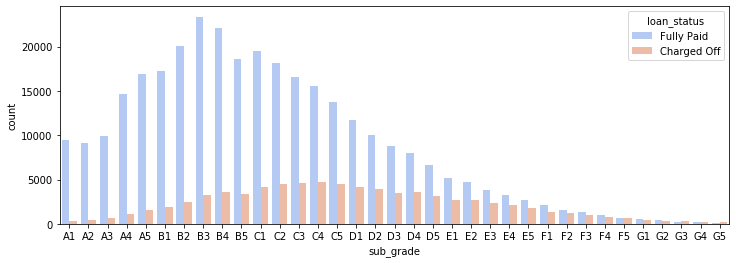

In [15]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

It looks like F and G subgrades don't get paid back that often. Let us isloate those and recreate the countplot just for those subgrades.

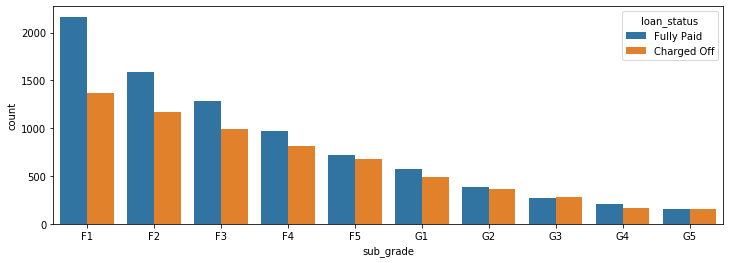

In [16]:
# subsetting the dataframe
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

Now let us create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [17]:
# double checking the unique values of loan_status column
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [18]:
# maping full paid into 1 and charged off into 0
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [19]:
# comparing the new and old label columns side by side
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column. 

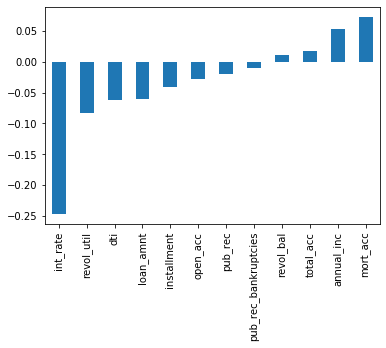

In [20]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

You can see that interet rate has the highest negative correlation whether or not someone will pay back the loan which actually make sense.

### Section 2: Data PreProcessing

__This section will remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.__



In [21]:
# printing the dataset agin
print("The shape of the dataset is:", df.shape)
df.head()

The shape of the dataset is: (396030, 28)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


Frst let us deal with missing data.

In [22]:
# Creating a Series that displays the total count of missing values per column
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [23]:
# Convert the above series to be in term of percentage of the total DataFrame
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's closely examine emp_title(The job title supplied by the Borrower when applying for the loan) and emp_length(Employment length in years) to see whether it will be okay to drop them.

In [24]:
# checking how many unique job titles there are.
df['emp_title'].nunique()

173105

In [25]:
# display job title value counts
df['emp_title'].value_counts()

Teacher                4389
Manager                4250
Registered Nurse       1856
RN                     1846
Supervisor             1830
                       ... 
USA Environment           1
Senior II                 1
MGM Grand Las Vegas       1
Tech Service Mgr.         1
Section leader            1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. So let's remove emp_title column.

In [26]:
# removing emp_title column
df = df.drop('emp_title',axis=1)

Next we will create a count plot of the emp_length feature column. we will sort the order of the values.

In [27]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [28]:
# creating a list of length of employment
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

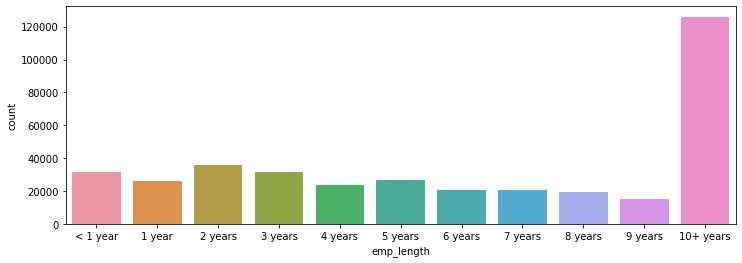

In [29]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

It seems that the majority of loan applicants has been working for 10 or more years, and most people have working 1 or more years.

Next we will compare and plot Fully Paid vs Charged Off loans based on employment length.

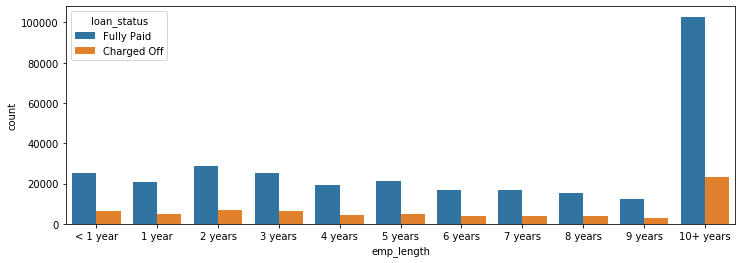

In [30]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 

In [31]:
# finding the count of charge off loans based on employment length
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

# finding the count of fully paid loans based on employment length
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

# finding the ratio
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

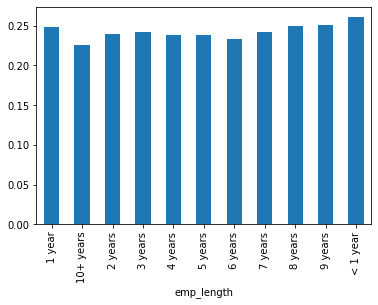

In [32]:
# plotting the ratio
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. So we will go ahead and drop the emp_length column.

In [33]:
# dropping the emp_length column
df = df.drop('emp_length',axis=1)

Let us revisit the DataFrame to see what feature columns still have missing data.

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Reviewwing the title column vs the purpose columns to see if this is a repeated information.

In [35]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [36]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. We will go ahead and drop the title column.

In [37]:
# dropping the title column
df = df.drop('title',axis=1)

Creating a value_counts of the mort_acc (Number of mortgage accounts) column.

In [38]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or we could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! but first let's review other columns to see which most highly correlates to mort_acc.

In [39]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [40]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Then let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [41]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [42]:
#total_acc_avg[2.0]

In [43]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [44]:
# applying the function
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [45]:
# checking if mort_acc missing values are 0
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Finally revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So wil will go ahead and remove the rows that are missing those values in those columns.

In [46]:
# dropping missin rows
df = df.dropna()

In [47]:
# confirming that all columns have 0 missing values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Wow! that was intense, finally we're done working with missing data! Now we just need to deal with the string values due to the categorical columns.

In [48]:
# Listing all features that are non numeric
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's now go through all the string features to see what we should do with them.

__term feature column__: We will start with term feature

In [49]:
# checking value counts of term column
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Since the column has only two values we will convert the term feature into either a 36 or 60 integer numeric data type.

In [50]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [51]:
# checking the term column again
print(df['term'].value_counts())
df['term'].head(8)

36    301247
60     93972
Name: term, dtype: int64


0    36
1    36
2    36
3    36
4    60
5    36
6    36
7    36
Name: term, dtype: int64

__grade feature column__: Next we will deal with the grade column. We already know that grade is part of sub_grade, so we will drop the grade feature.

In [52]:
df = df.drop('grade',axis=1)

__subgrade column__: We will convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. we also should not forget to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [53]:
# getting the dummies
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

# removing the original column and concatinating the dummies along with columns
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [54]:
# checking the columns again to see if we have more columns now
#df.columns

In [55]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Converting __['verification_status', 'application_type','initial_list_status','purpose']__ columns into dummy variables and concatenate them with the original dataframe.

In [56]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
#df.columns

__home_ownership column__: Review the value_counts for the home_ownership column.

In [57]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Since None and any have view values we will add them to OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. We will also convert them to dummy variables an then concatenate them with the original dataframe.

In [58]:
# replacing none and any with other
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# converting home_ownership column into dummy variables
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [59]:
#df.columns

__address column__: we will feature engineer a zip code column from the address in the data set.  we will create a column called 'zip_code' that extracts the zip code from the address column.

In [60]:
# double checking the address column
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [61]:
# grapping the zipcode number from the address column
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [62]:
# making the zip_code column into dummy variables
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

__issue_d column__: Since this column stands for the month which the loan was funded it would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we will drop this feature.

In [63]:
# droping issue_d column
df = df.drop('issue_d',axis=1)

__earliest_cr_line__: This column stands the month the borrower's earliest reported credit line was created. This appears to be a historical time stamp feature. What we will do is we will extract the year from this feature then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the original earliest_cr_line feature.

In [64]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [65]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999


### Train Test Split

In [66]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

First let's drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [67]:
# loan_status column
df = df.drop('loan_status',axis=1)

Set X and y variables to the .values of the features and label.

In [68]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

Perform a train/test split with test_size=0.2 and a random_state of 101.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

__Normalizing the Data__ We will use MinMaxScaler to normalize the feature data X_train and X_test. 

In [70]:
# importint MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

In [71]:
# importing the necessary Keras functions
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

Next we will build a sequential model to be trained on the data. Here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron.

In [72]:
# checking the number of our final number of features
X_train.shape

(316175, 78)

In [73]:
model = Sequential()

# inputing 78 layer since our number of features are 78
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model to the training data for 25 epochs.

In [74]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 17s 55us/sample - loss: 0.2980 - val_loss: 0.2649
Epoch 2/25
316175/316175 [==============================] - 9s 30us/sample - loss: 0.2652 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 9s 29us/sample - loss: 0.2628 - val_loss: 0.2628
Epoch 4/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2617 - val_loss: 0.2619
Epoch 5/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2612 - val_loss: 0.2625
Epoch 6/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2604 - val_loss: 0.2616
Epoch 7/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2599 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2598 - val_loss: 0.2615
Epoch 9/25
316175/316175 [==============================] - 6s 20us/sample -

Let us save our model.

In [78]:
from tensorflow.keras.models import load_model
model.save('predicting_loan_repayment.h5') 

### Section 3: Evaluating Model Performance.

Plot out the validation loss versus the training loss.

In [79]:
losses = pd.DataFrame(model.history.history)

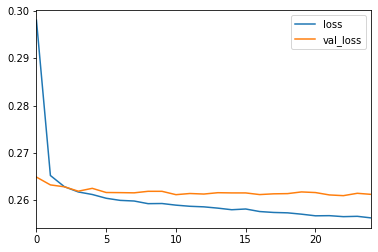

In [80]:
losses[['loss','val_loss']].plot()

Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [82]:
# creating confusion matrix
confusion_matrix(y_test,predictions)

array([[ 6904,  8754],
       [  124, 63262]], dtype=int64)

__Predicting brand new customer:__ given the customer below, would you offer this person a loan?

In [83]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [84]:
# scaling our new customer data 
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [85]:
# pridictiong new customer
model.predict_classes(new_customer)

array([[1]])

Now check, did this person actually end up paying back their loan?

In [86]:
df.iloc[random_ind]['loan_repaid']

1.0

# <center> END </center>